In [272]:
import pandas as pd 
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from PIL import Image

from load_classes import fetch_classdict

In [332]:
n_metadf = pd.read_csv('metadata.csv').drop('Unnamed: 0',axis=1)
classes = fetch_classdict()

In [30]:
metadf.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


### To do 
- [x] The class columns and the target-labels mentioned in the dataframe are unreliable, so we need to re-create them from the actual columns itself.
- [ ]  Re-engineering the paths to fit the current file structure.
- [ ]  A pipeline script which takes a particular patient_id and prints a subplot of both left_right fundus with their diagnosis as the title.

In [34]:
cls_df = metadf.iloc[:,7:-4]
cls_df  

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6387,0,1,0,0,0,0,0,0
6388,0,1,0,0,0,0,0,0
6389,0,1,0,0,0,0,0,0
6390,0,1,0,0,0,0,0,0


In [35]:
# test 
cls_df.iloc[0,:].idxmax()

'C'

In [36]:
# Engineering Class Labels from the one-hot formatted classes
class_labels = []
for idx in range(len(cls_df)):
    class_labels.append(cls_df.iloc[idx,:].idxmax())
class_labels[:5]

['C', 'N', 'D', 'D', 'D']

In [37]:
# Assigning classes to the metadf
metadf['True_Labels'] = class_labels

In [38]:
# Mapping Diagnosis with Labels
metadf['Diagnosis'] = metadf['True_Labels'].map(classes)

In [42]:
# remapping columns 
cols = metadf.columns
newcols = pd.Series(cols).replace(classes).to_list()
n_metadf = metadf.copy(deep=True)
n_metadf.columns = newcols
n_metadf.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,Normal,Diabetes,Glaucoma,...,Age,Hypertension,Pathological,Other,filepath,labels,target,filename,True_Labels,Diagnosis
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,C,Cataract
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,N,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,D,Diabetes


In [43]:
# dropping target and labels columns 
n_metadf = n_metadf.drop(['labels','target'],axis=1)
n_metadf

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,Normal,Diabetes,Glaucoma,Cataract,Age,Hypertension,Pathological,Other,filepath,filename,True_Labels,Diagnosis
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,0_right.jpg,C,Cataract
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,1_right.jpg,N,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,2_right.jpg,D,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,4_right.jpg,D,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,5_right.jpg,D,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,4686_left.jpg,D,Diabetes
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,4688_left.jpg,D,Diabetes
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,4689_left.jpg,D,Diabetes
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,4690_left.jpg,D,Diabetes


In [44]:
# saving progress
n_metadf.to_csv('metadata.csv')

### To do 
- [x] The class columns and the target-labels mentioned in the dataframe are unreliable, so we need to re-create them from the actual columns itself.
- [ ]  Re-engineering the paths to fit the current file structure.
- [ ]  A pipeline script which takes a particular patient_id and prints a subplot of both left_right fundus with their diagnosis as the title.

### Restructuring Paths

In [ ]:
# Data Frame Structure
# - ../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg
# Intended Structure
# - ../ODIR-data/ODIR-5K/ODIR-5K/Training Images/0_right.jpg

In [91]:
# Path restoration
sample_path = n_metadf['filepath'][0]
sample_path

'../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg'

In [97]:
# split and rejoin the wanted elements
sample_path = sample_path.split('/')[3:]
sample_path.insert(0, 'ODIR-5K')

In [98]:
# testing
sample_path = os.path.join('../','ODIR-data','/'.join(sample_path))
sample_path

'../ODIR-data/ODIR-5K/ODIR-5K/Training Images/0_right.jpg'

In [99]:
# map function
def restructure_path(path):
    pathlist = path.split('/')[3:]
    pathlist.insert(0,'ODIR-5K')
    final_path = os.path.join('../','ODIR-data','/'.join(pathlist))
    return final_path

In [101]:
# Mapping Path Restoration
n_metadf['filepath'] = n_metadf['filepath'].apply(restructure_path)

In [ ]:
# test
# Image.open(n_metadf['filepath'][0]) -- passed

In [333]:
# Sorting
# n_metadf = n_metadf.sort_values(by='ID')
# n_metadf.reset_index(inplace=True,drop=True)

In [337]:
# save progress
# n_metadf.to_csv('metadata.csv')

### To do 
- [x] The class columns and the target-labels mentioned in the dataframe are unreliable, so we need to re-create them from the actual columns itself.
- [x]  Re-engineering the paths to fit the current file structure.
- [ ]  A pipeline script which takes a particular patient_id and prints a subplot of both left_right fundus with their diagnosis as the title.

### PipeLine to Plot Fundus Images

In [275]:
# Things to take into account
'''
* File name format, ID_{left | right}.jpg
'''

'\n* File name format, ID_{left | right}.jpg\n'

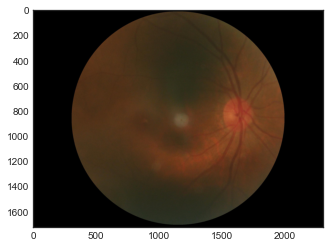

In [276]:
# testing 
plt.style.use('seaborn-white')
sample_image = n_metadf['filepath'][0]
plt.imshow(np.array(Image.open(sample_image)))
plt.grid = False

In [339]:
n_metadf.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,Normal,Diabetes,Glaucoma,Cataract,Age,Hypertension,Pathological,Other,filepath,filename,True_Labels,Diagnosis
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/0...,0_right.jpg,C,Cataract
1,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/0...,0_left.jpg,C,Cataract
2,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/1...,1_left.jpg,N,Normal
3,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/1...,1_right.jpg,N,Normal
4,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/2...,2_right.jpg,D,Diabetes
5,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/3...,3_left.jpg,O,Other
6,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/4...,4_right.jpg,D,Diabetes
7,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/4...,4_left.jpg,D,Diabetes
8,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/5...,5_left.jpg,D,Diabetes
9,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../ODIR-data/ODIR-5K/ODIR-5K/Training Images/5...,5_right.jpg,D,Diabetes


In [390]:
def plot_fundus(id, n_metadf):
    docs ='''
= Takes the ID number of the Patient and plots the patient's fundus Imagery ( Left | Right ).
- ID Range: 1-4784.
    '''
    # presets
    plt.style.use('seaborn-white')
    path_structure = '../ODIR-data/ODIR-5K/ODIR-5K/Training Images/'
    
    # forging data
    left_f = os.path.join(path_structure, f'{id}_left.jpg')
    right_f = os.path.join(path_structure, f'{id}_right.jpg')
    left_arr = plt.imread(left_f)
    right_arr = plt.imread(right_f)
    
    # Patient Data
    diagnosis_left = n_metadf[n_metadf['ID'] == id]['Diagnosis'].reset_index(drop=True)[0]
    diagnosis_right = n_metadf[n_metadf['ID'] == id]['Diagnosis'].reset_index(drop=True)[1]

    
    fig, axs = plt.subplots(ncols=2,figsize=(15,7))

    axs[0].set_title(f'LF Diagnosis: {diagnosis_left.capitalize()}',size=15)
    axs[0].imshow(left_arr)

    axs[1].set_title(f'RF Diagnosis: {diagnosis_right.capitalize()}',size=15)
    axs[1].imshow(right_arr)
    
    fig.suptitle(f'Patient ID: {id}',size=20)
    plt.show()
    

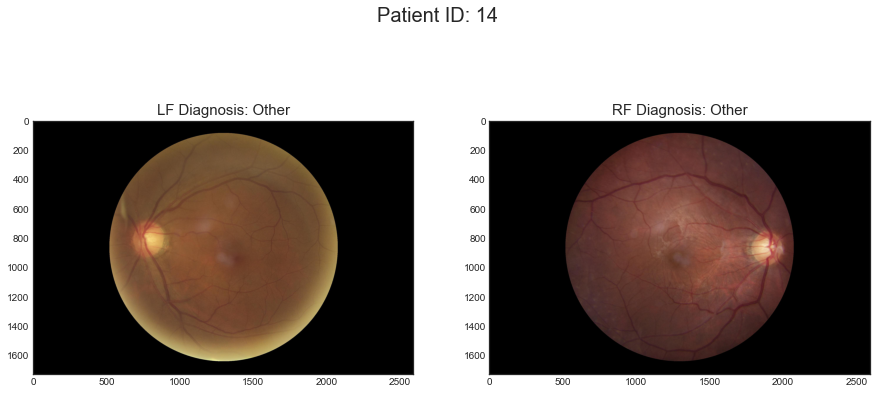

In [399]:
plot_fundus(14, n_metadf)

In [ ]:
#